# Lab3 2019707033 김태윤

 	

Lab assignment #3:

In this lab guide, we will try to predict the grades of students in mathematics class of two 
Portuguese schools. Specifically, we are to predict the final grades of the students. The data used 
here represents the student achievement in secondary education of two Portuguese schools. The 
data includes student grades, demographic, social, and school-related features, and it was collected 
by using school reports and questionnaires. A dataset is provided that describes the results of the 
mathematics class. The feature "G3" is the final year grade that needs to be predicted, while 
features "G1" and "G2" are the 1st and 2nd period grades. Since "G1" and "G2" are also grades, just 
at different periods, it will be much easier to predict "G3" since they are highly correlated. But it is 
more useful to predict "G3" without "G1" and "G2". 


두 포르투갈 학교의 수학 수업 학생들의 최종 성적을 예측하려고 함.
입력 데이터는 각 학교 중등 교육에서의 학생의 성취도임.
G3 피쳐는 우리가 예측해야하는 등급.
G1과 G2는 1, 2교시 등급. G3가 예측하고자 하는 등급.


- Grades:  
 
1. G1 - first period grade (numeric: from 0 to 20) 
2. G2 - second period grade (numeric: from 0 to 20) 
3. G3 - final grade (numeric: from 0 to 20, output target) 


- 목적
    - 이번 Lab에서는 제공된 기능을 활용하여 G3를 예측하게 된다. 분류 문제로 해결할 수 있지만, regression을 활용하여 원점수를 예측하고자 함.


# Example Code

## 1. Data analysis

In [39]:
# Module Import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
student = pd.read_csv('./student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


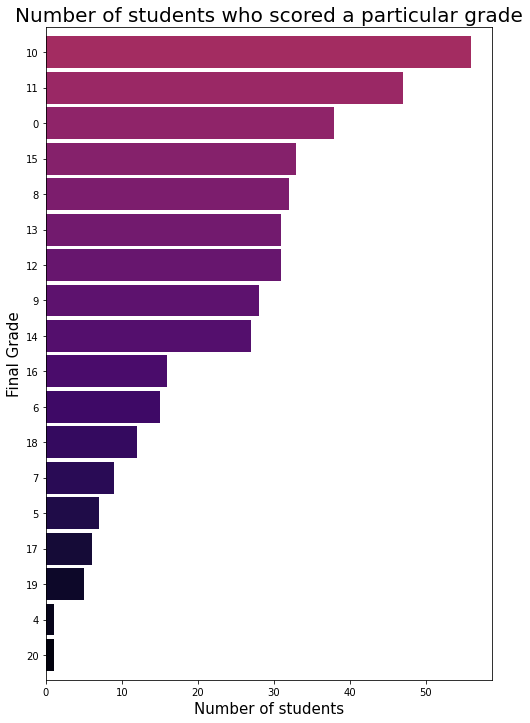

In [3]:
plt.subplots(figsize=(8,12))
grade_counts = student['G3'].value_counts().sort_values().plot.barh(width=.9, color=sns.color_palette('inferno', 40))
grade_counts.axes.set_title('Number of students who scored a particular grade', fontsize=20)
grade_counts.set_xlabel('Number of students', fontsize=15)
grade_counts.set_ylabel('Final Grade', fontsize=15)
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


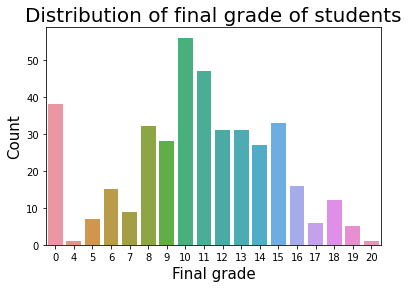

In [4]:
b = sns.countplot(student['G3'])
b.axes.set_title('Distribution of final grade of students', fontsize=20)
b.set_xlabel('Final grade', fontsize=15)
b.set_ylabel('Count', fontsize=15)
plt.show()

In [5]:
male_studs = len(student[student['sex'] == 'M'])
female_studs = len(student[student['sex'] == 'F'])

print('Number of male students: ', male_studs)
print('Number of female students: ', female_studs)

Number of male students:  187
Number of female students:  208


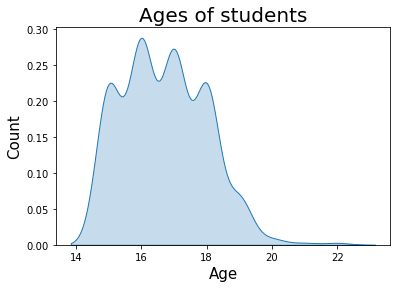

In [6]:
b = sns.kdeplot(student['age'], shade=True)
b.axes.set_title('Ages of students', fontsize=20)
b.set_xlabel('Age', fontsize=15)
b.set_ylabel('Count', fontsize=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


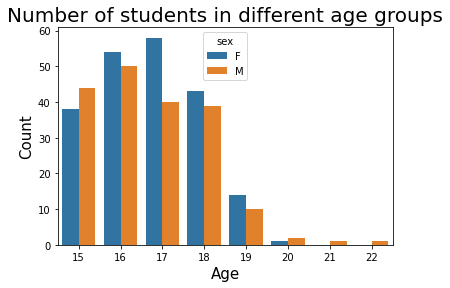

In [7]:
b = sns.countplot('age', hue='sex', data=student)
b.axes.set_title('Number of students in different age groups', fontsize=20)
b.set_xlabel('Age', fontsize=15)
b.set_ylabel('Count', fontsize=15)
plt.show()

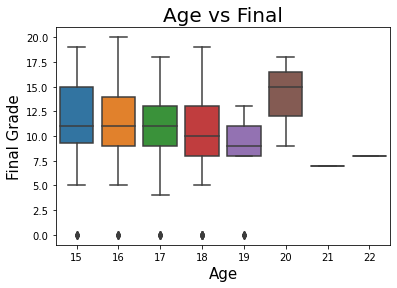

In [8]:
b = sns.boxplot(x='age', y='G3', data=student)
b.axes.set_title('Age vs Final', fontsize=20)
b.set_xlabel('Age', fontsize=15)
b.set_ylabel('Final Grade', fontsize=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


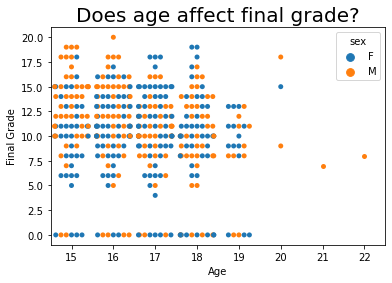

In [9]:
b = sns.swarmplot(x='age', y='G3', hue='sex', data=student)
b.axes.set_title('Does age affect final grade?', fontsize=20)
b.set_xlabel('Age', fontsize=10)
b.set_ylabel('Final Grade', fontsize=10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


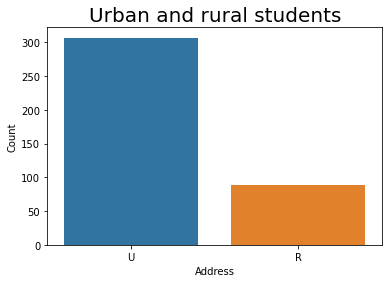

In [10]:
b = sns.countplot(student['address'])
b.axes.set_title('Urban and rural students', fontsize=20)
b.set_xlabel('Address', fontsize=10)
b.set_ylabel('Count', fontsize=10)
plt.show()

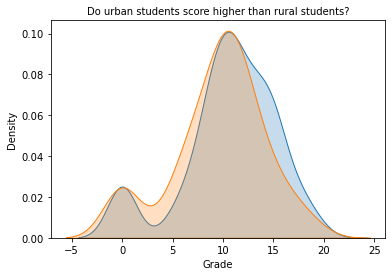

In [11]:
# Grade distribution by address
sns.kdeplot(student.loc[student['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(student.loc[student['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize=10)
plt.xlabel('Grade', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

## 2. One-hot encoding

In [12]:
category_df = student.select_dtypes(include=['object'])
dummy_df = pd.get_dummies(category_df)
dummy_df['G3'] = student['G3']

In [13]:
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,10


In [14]:
student = student.drop(['school', 'G1', 'G2'], axis=1)
student = pd.get_dummies(student)

In [15]:
student.shape

(395, 55)

In [16]:
student.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [17]:
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)

# will use the top 8 most correlated features with grade
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [18]:
student_corr = student.loc[:, most_correlated.index]
student_corr.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1


## 3. Analysis of the most correlated features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


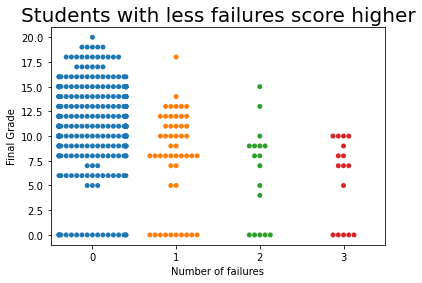

In [19]:
b = sns.swarmplot(x=student_corr['failures'], y=student_corr['G3'])
b.axes.set_title('Students with less failures score higher', fontsize=20)
b.set_xlabel('Number of failures', fontsize=10)
b.set_ylabel('Final Grade', fontsize=10)
plt.show()

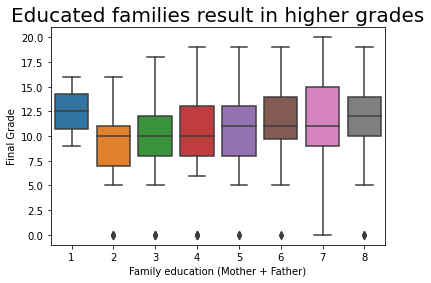

In [20]:
family_ed = student_corr['Fedu'] + student_corr['Medu']
b = sns.boxplot(x=family_ed, y=student_corr['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize=20)
b.set_xlabel('Family education (Mother + Father)', fontsize=10)
b.set_ylabel('Final Grade', fontsize=10)
plt.show()

## 4. Machine Learning modeling

In [21]:
X = student_corr.drop(['G3'], axis=1)
y = student_corr['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.head()

,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
192,0,1,1,0,17,2,4,1
179,0,4,1,0,17,3,3,0
254,0,2,1,0,17,1,2,1
371,0,1,0,1,18,2,3,0
214,0,4,1,0,17,4,1,1


In [41]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.643205776170937
RMSE:  4.617151169714841
R-squared:  0.10752791857389155


In [42]:
# Elastic net
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train, y_train)

y_pred = en.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.604196812878762
RMSE:  4.699723202429177
R-squared:  0.07532096354909779


In [44]:
# SVM
svr = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.6417929597566516
RMSE:  4.655420460175467
R-squared:  0.09267208387380899


In [45]:
# Decision tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  4.4481012658227845
RMSE:  5.858764936595295
R-squared:  -0.4370060573130483


In [46]:
# Gradient boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.705516409438643
RMSE:  4.81999989005081
R-squared:  0.027386019311622656


In [47]:
# Extra trees
et = ExtraTreesRegressor()
et.fit(X_train, y_train)

y_pred = et.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  4.067601265822785
RMSE:  5.360823524657157
R-squared:  -0.20312145839016482


In [48]:
# Random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.814878865508612
RMSE:  4.999398800037821
R-squared:  -0.04636213318117033


In [49]:
# MLP (Multi-layer perceptron)
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('MAE: ', mae)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MAE:  3.660397051336514
RMSE:  4.604975655569252
R-squared:  0.11222864364274832


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


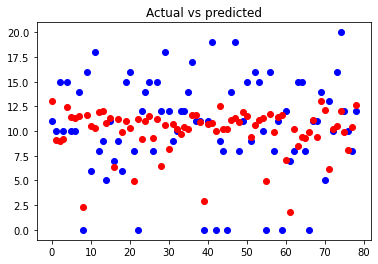

In [50]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('Actual vs predicted')
plt.show()

## 5. Regression with all features

## 6. Feature importance

Feature: 0, Score: 0.20338
Feature: 1, Score: 0.14124
Feature: 2, Score: 0.02635
Feature: 3, Score: 0.02034
Feature: 4, Score: 0.18849
Feature: 5, Score: 0.15173
Feature: 6, Score: 0.18998
Feature: 7, Score: 0.07850


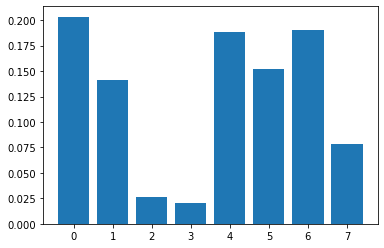

In [51]:
importance = rf.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Assignment

Using the same data, you are to try the same problem as above, regression prediction of students' 
final grades (G3), but with some additional steps:  
 
1. Apply standardisation (any standardisation methods) to the features and try predicting the final grade (G3).
2. Apply hyperparameter tuning to the models and explain the differences in performances. 
3. Include "G1" and "G2" features to the features and explain the differences in performances. 
4. Explain and justify whether "G1" and "G2" features should be added or not. 



같은 데이터로, 위의 문제와 같은 과정을 진행하면 됨. 학생의 최종성적(G3)을 regression prediction 하면 됨. 근데 추가사항이 있음.

1. features에 표준화(방법 상관X)를 활용하여 G3를 예측해보기
2. 모델의 하이퍼파라미터를 수정해보고 성능의 변화를 설명하기
3. features에 G1, G2를 포함시켜보고 성능의 차이를 설명하기
4. 결론적으로 G1, G2가 필요한지 불필요한지 판단하고 설명하라.